<a href="https://colab.research.google.com/github/OhadHayoun/CNN-model/blob/master/CNN%20Ohad%20-%20Dogs%20vs%20Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow_datasets as tfds
from tqdm.notebook import tqdm
import numpy as np

ds, ds_info = tfds.load('cats_vs_dogs', with_info=True)
num_examples = ds_info.splits['train'].num_examples
image_gen = (obj['image'].numpy() for obj in ds['train'])
label_gen = tqdm(ds['train'], total=num_examples, desc="Loading labels")
labels = np.array([obj['label'].numpy() for obj in label_gen])

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
image_gen = (obj['image'].numpy() for obj in ds['train'])
x = np.array([cv.resize(image, (80, 80)) for image in image_gen])

In [ ]:
x.shape

(23262, 80, 80, 3)

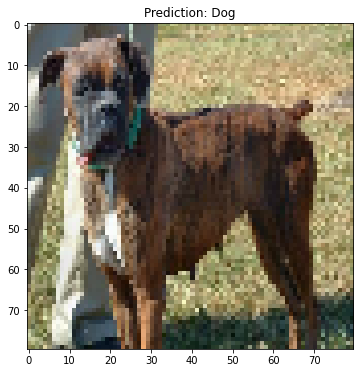

In [ ]:
img = x[0]
labels_dict = {0: 'Cat', 1: 'Dog'}
label = labels_dict[labels[0]]

plt.figure(figsize=(6, 6))
plt.title(f"Prediction: {label}")
plt.imshow(img)

In [ ]:

# Label 0 = Cat
# Label 1 = Dog

In [ ]:
dogs_n = (labels == 1).sum()
cats_n = (labels == 0).sum()

print(f"dogs number = {dogs_n}")
print(f"cats number = {cats_n}")


dogs number = 11604
cats number = 11658


In [ ]:
x.shape

(23262, 80, 80, 3)

The image (x) is in (N, H, W, C) format.

In [ ]:
'''
N: number of images in batch
H: image height
W: image width
C: number of channels (3 for RGB images, 1 for grayscale images)
Image data is in NHWC format if it has shape (N, H, W, C) and it is in NCHW format if it has shape (N, C, H, W). Is X in NHWC format or NCHW format?
'''

'\nN: number of images in batch\nH: image height\nW: image width\nC: number of channels (3 for RGB images, 1 for grayscale images)\nImage data is in NHWC format if it has shape (N, H, W, C) and it is in NCHW format if it has shape (N, C, H, W). Is X in NHWC format or NCHW format?\n'

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [ ]:
X_train, X_test, labels_train, labels_test = train_test_split(x, labels,
                                                              random_state=42,
                                                              test_size=0.1,
                                                              stratify=labels)

In [ ]:
print(f"Train Set, Test Set: {len(X_train)/len(x):.2%} , {len(X_test)/len(x):.2%}")

Train Set, Test Set: 90.00% , 10.00%


In [ ]:
input_shape = (80, 80, 3)

cnn_model = Sequential([Rescaling(scale=1./255, name="Input", input_shape=input_shape), 
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_layer_1'), 
                   MaxPool2D(pool_size=(2, 2),name="Max_Pooling_1"), 
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_layer_2'), 
                   MaxPool2D(pool_size=(2, 2),name="Max_Pooling_2"),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_layer_3'), 
                   MaxPool2D(pool_size=(2, 2),name="Max_Pooling_3"),
                   Flatten(),
                   Dense(units=64, activation='relu', name="FC"),
                   Dense(units=1, activation='sigmoid', name="Output")])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Rescaling)            (None, 80, 80, 3)         0         
_________________________________________________________________
Conv_layer_1 (Conv2D)        (None, 78, 78, 64)        1792      
_________________________________________________________________
Max_Pooling_1 (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
Conv_layer_2 (Conv2D)        (None, 37, 37, 64)        36928     
_________________________________________________________________
Max_Pooling_2 (MaxPooling2D) (None, 18, 18, 64)        0         
_________________________________________________________________
Conv_layer_3 (Conv2D)        (None, 16, 16, 64)        36928     
_________________________________________________________________
Max_Pooling_3 (MaxPooling2D) (None, 8, 8, 64)          0

In [ ]:
print('cnn_model.input_shape:',cnn_model.input_shape)
print('cnn_model.output_shape:',cnn_model.output_shape) 


cnn_model.input_shape: (None, 80, 80, 3)
cnn_model.output_shape: (None, 1)


The model input and output shapes fits the requested model.

### Fitting The Model

In [ ]:
epochs = 5
batch_size=14

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fit_result = cnn_model.fit(X_train, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
1346/1346 [==============================] - 10s 6ms/step - loss: 0.6776 - accuracy: 0.5613 - val_loss: 0.5263 - val_accuracy: 0.7278
Epoch 2/5
1346/1346 [==============================] - 7s 5ms/step - loss: 0.5228 - accuracy: 0.7391 - val_loss: 0.4649 - val_accuracy: 0.7679
Epoch 3/5
1346/1346 [==============================] - 7s 5ms/step - loss: 0.4325 - accuracy: 0.7985 - val_loss: 0.3801 - val_accuracy: 0.8329
Epoch 4/5
1346/1346 [==============================] - 7s 5ms/step - loss: 0.3787 - accuracy: 0.8269 - val_loss: 0.4093 - val_accuracy: 0.8080
Epoch 5/5
1346/1346 [==============================] - 7s 5ms/step - loss: 0.3293 - accuracy: 0.8550 - val_loss: 0.3604 - val_accuracy: 0.8386


In [ ]:
best_val_acc = max(fit_result.history['val_accuracy'])
print(f"Validation accuracy = {round(best_val_acc, 4)} with batch_size={batch_size} and epochs={epochs}")

Validation accuracy = 0.8386 with batch_size=14 and epochs=5


In [ ]:
scores = cnn_model.evaluate(x=X_test, y=labels_test, verbose=1)

73/73 [==============================] - 0s 4ms/step - loss: 0.3704 - accuracy: 0.8393


In [ ]:
loss, accuracy = scores
print("Final model Loss: ", round(loss, 4))
print(f"Final Model Accuracy: {accuracy:.3%}" )

Final model Loss:  0.3704
Final Model Accuracy: 83.928%


### Model prediction results 

In [ ]:
y_pred =np.squeeze(cnn_model.predict(X_test))

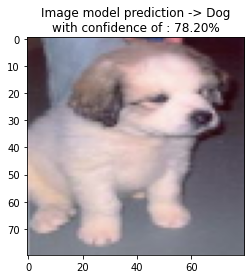

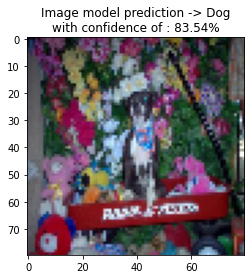

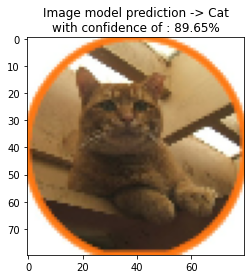

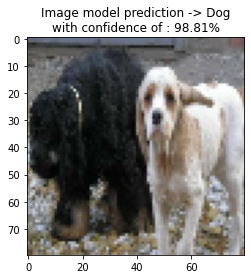

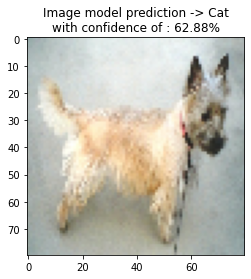

In [ ]:
samples_n = 5
for i in range(samples_n):
  index = np.random.randint(0, y_pred.size)
  img = X_test[index]
  prob = y_pred[index]
  if prob > 0.5:
    label = 'Dog'
    confidence = prob
  else:
    label = 'Cat'
    confidence = 1-prob
  plt.title(f"Image model prediction -> {label}\nwith confidence of : {confidence:.2%}")
  plt.imshow(img)
  plt.show()
